# Infos

source
- https://www.geeksforgeeks.org/python-find-current-weather-of-any-city-using-openweathermap-api/
- https://openweathermap.org/

# import packages

In [1]:
#import pandas as pd
#import numpy as np
#import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
#import requests, json 
from  myfunc import get_api_data, weather_data_call,format_forcast
import gspread
from oauth2client.service_account import ServiceAccountCredentials

# import API Key

In [2]:
# use self made func
data=get_api_data("api_data/info.txt")
#arrange data
api_key=data[0][:-1]
#base_url_current=data[1][:-1]
base_url_forcast=data[2][:-1]
city_name=data[3][:-1]

# Get Data via API Call

In [2]:
request=weather_data_call(api_key,base_url_forcast,city_name)

NameError: name 'weather_data_call' is not defined

In [4]:
#see result
#request.content
#request.json()

# export CSV 

## Format result

In [5]:
df_weather=format_forcast(request)

In [6]:
df_weather.head()

,temp,humidity,wind_speed,wind_dir,weather
datetime,,,,,
2020-03-13 15:00:00,9.20,66,9.29,268,Rain
2020-03-13 18:00:00,7.74,68,7.48,279,Rain
2020-03-13 21:00:00,4.63,64,7.17,291,Clear
2020-03-14 00:00:00,2.75,73,4.72,306,Clouds
2020-03-14 03:00:00,1.08,74,3.14,321,Clouds


## Export

In [7]:
export_file_name=''
export_file_name='forecast/forcast_'+str(df_weather.index[0]).replace(' ','_').replace(':','-')+'.csv'
df_weather.to_csv(export_file_name,sep=',')

## Plot

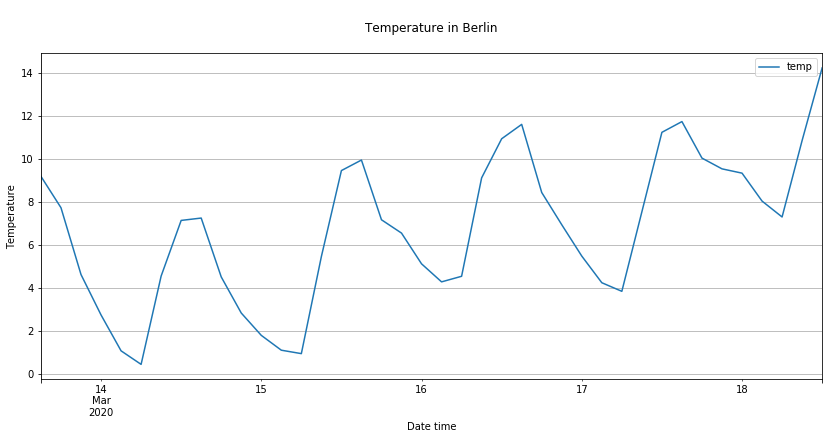

In [8]:
if True:
    plt.figure(figsize=(14,6))
    df_weather['temp'].plot()
    plt.xlabel('Date time')
    plt.ylabel('Temperature')
    plt.title('\nTemperature in Berlin\n')
    plt.grid()
    plt.legend()
    plt.show()

# Export Json database

In [9]:
#print
#request.content
#request.json()

In [10]:
#write Json
export_file_name=''
export_file_name='forecast/forcast_'+str(df_weather.index[0]).replace(' ','_').replace(':','-')+'.json'

In [11]:
with open(export_file_name, 'wb') as f:
    f.write(request.content)

In [12]:
#read Json
with open(export_file_name) as json_file:
    data = json.load(json_file)
    i=0
    for p in data['list']:
        if i<5:
            print(p['main']['temp'])
        i+=1
        
        

282.35
280.89
277.78
275.9
274.23


# google API

In [15]:
#authentication to google api using JSON credential file
scope = ['https://spreadsheets.google.com/feeds','https://www.googleapis.com/auth/drive']
creds = ServiceAccountCredentials.from_json_keyfile_name('api_data/WDcred.json', scope)
client = gspread.authorize(creds)

In [16]:
#get current weather berlin sheet
forecast_weather = client.open('forcast_weater_berlin')

In [ ]:
forecast_weather

In [ ]:
#rewrite data

{'spreadsheetId': '1Us3ubvtweNTf6NncVXHeW6XX5DeeJ8D4lvAfP6le1GQ',
 'tableRange': 'current_weater_berlin!A1:L2',
 'updates': {'spreadsheetId': '1Us3ubvtweNTf6NncVXHeW6XX5DeeJ8D4lvAfP6le1GQ',
  'updatedRange': 'current_weater_berlin!A3:L3',
  'updatedRows': 1,
  'updatedColumns': 12,
  'updatedCells': 12}}